In [1]:
# Импортируем библиотеки
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

In [2]:
# Загружаем датасет
online_retail = fetch_ucirepo(id=352)
X = online_retail.data.features
y = online_retail.data.targets

In [3]:
# Просмотрим первые несколько строк данных
print("Первые строки данных:")
X.head()

Первые строки данных:


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Общая информация о данных
print("\nИнформация о данных:")
X.info()


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [5]:
# Проверим, есть ли пропущенные значения в каждом столбце
print("\nПропущенные значения в каждом столбце:")
X.isnull().sum()


Пропущенные значения в каждом столбце:


Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Проверим, сколько дублирующихся строк содержится в данных
print("\nКоличество дублирующихся строк:")
X.duplicated().sum()


Количество дублирующихся строк:


6007

In [7]:
# Удалим строки с пропущенными значениями
X = X.dropna()

In [8]:
# Удалим дублирующиеся строки
X = X.drop_duplicates()

In [9]:
# Проверим еще раз, что пропущенных значений больше нет
print("\nПропущенные значения после очистки:")
X.isnull().sum()


Пропущенные значения после очистки:


Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
# Проверим еще раз, что дублирующихся строк больше нет
print("\nКоличество дублирующихся строк после очистки:")
X.duplicated().sum()


Количество дублирующихся строк после очистки:


0

In [11]:
# Преобразуем 'InvoiceDate' в формат datetime
X['InvoiceDate'] = pd.to_datetime(X['InvoiceDate'], errors='coerce')

In [12]:
# Создадим новые столбцы 'Month' и 'DayOfWeek' на основе 'InvoiceDate'
X['Month'] = X['InvoiceDate'].dt.month
X['DayOfWeek'] = X['InvoiceDate'].dt.dayofweek

In [13]:
# Посмотрим, как распределены продажи по месяцам
print("Распределение продаж по месяцам:")
X['Month'].value_counts().sort_index()

Распределение продаж по месяцам:


Month
1     21664
2     20136
3     27510
4     22984
5     28654
6     27575
7     27253
8     27443
9     40454
10    49904
11    64225
12    43726
Name: count, dtype: int64

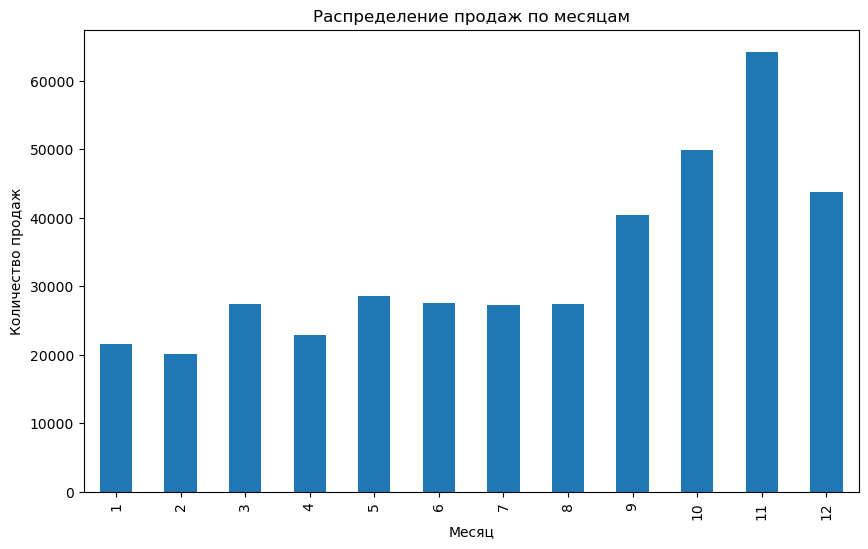

In [14]:
# Построим гистограмму продаж по месяцам
X['Month'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title("Распределение продаж по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество продаж")
plt.show()

In [15]:
# Преобразуем дни недели так, чтобы 1 = Понедельник, 7 = Воскресенье
X['DayOfWeek'] = X['DayOfWeek'] + 1

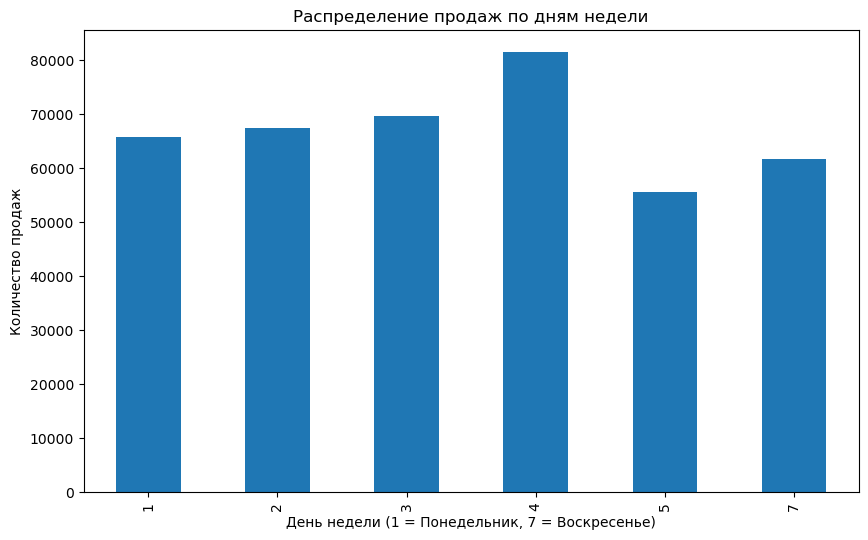

In [16]:
# Построим гистограмму продаж по дням недели
X['DayOfWeek'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title("Распределение продаж по дням недели")
plt.xlabel("День недели (1 = Понедельник, 7 = Воскресенье)")
plt.ylabel("Количество продаж")
plt.show()

In [17]:
# Найдем топ-10 самых продаваемых товаров
top_products = X['Description'].value_counts().head(10)
print("Топ-10 самых продаваемых товаров:")
top_products

Топ-10 самых продаваемых товаров:


Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1195
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: count, dtype: int64

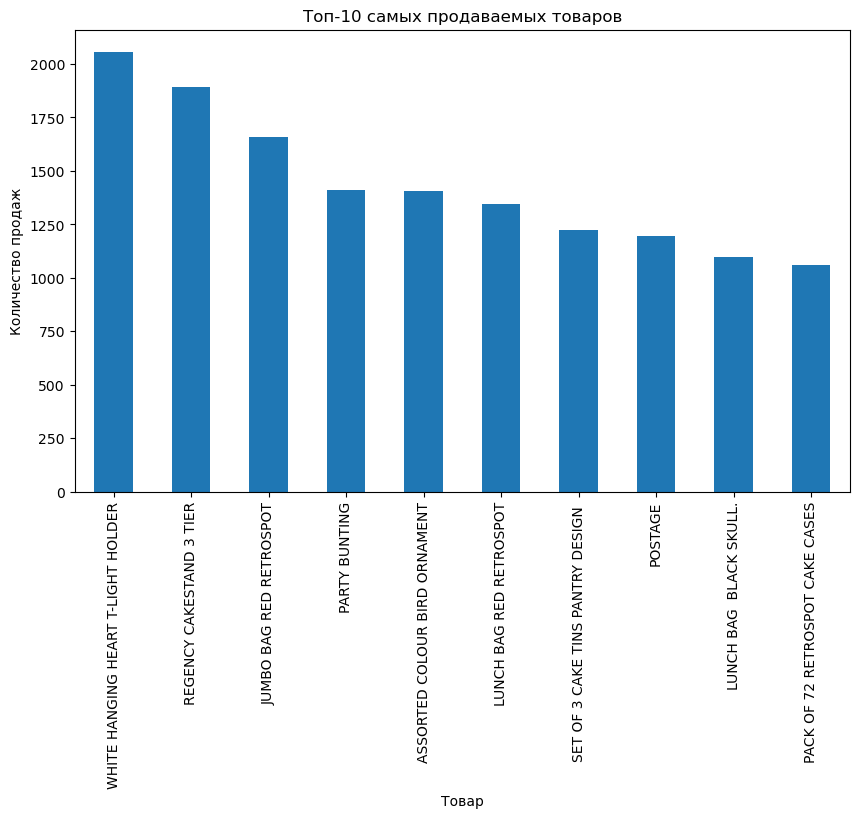

In [18]:
# Построим график для топ-10 самых продаваемых товаров
top_products.plot(kind='bar', figsize=(10, 6))
plt.title("Топ-10 самых продаваемых товаров")
plt.xlabel("Товар")
plt.ylabel("Количество продаж")
plt.show()

In [19]:
# Найдем количество покупок для каждого клиента
customer_purchases = X['CustomerID'].value_counts()
print("Распределение количества покупок на одного клиента:")
customer_purchases.head(10)

Распределение количества покупок на одного клиента:


CustomerID
17841.0    7810
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
15311.0    2478
14646.0    2085
13089.0    1853
13263.0    1667
14298.0    1638
Name: count, dtype: int64

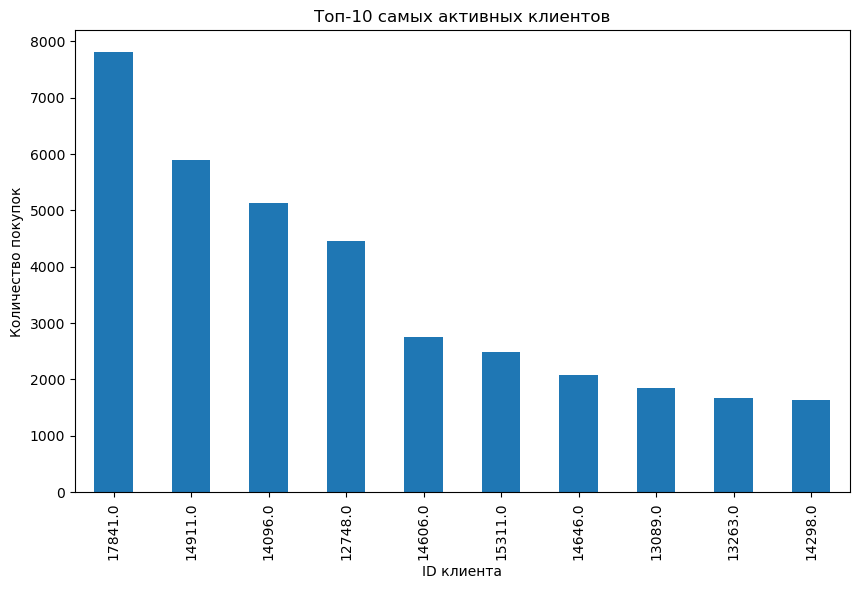

In [20]:
# Построим график для топ-10 самых активных клиентов
customer_purchases.head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Топ-10 самых активных клиентов")
plt.xlabel("ID клиента")
plt.ylabel("Количество покупок")
plt.show()

In [21]:
# Рассчитаем общее количество покупок и потраченную сумму для каждого клиента
customer_metrics = X.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).rename(columns={'Quantity': 'TotalQuantity', 'UnitPrice': 'AveragePrice'})

# Добавим столбец с общей потраченной суммой
customer_metrics['TotalSpent'] = customer_metrics['TotalQuantity'] * customer_metrics['AveragePrice']

# Посмотрим на первые строки с рассчитанными метриками
customer_metrics.head()

,TotalQuantity,AveragePrice,TotalSpent
CustomerID,,,
12346.0,0,1.040000,0.000000
12347.0,2458,2.644011,6498.979011
12348.0,2341,5.764839,13495.487419
12349.0,631,8.289041,5230.384932
12350.0,197,3.841176,756.711765


In [22]:
# Импортируем библиотеку для стандартизации
from sklearn.preprocessing import StandardScaler

# Стандартизируем данные по метрикам TotalQuantity и TotalSpent
scaler = StandardScaler()
customer_metrics_scaled = scaler.fit_transform(customer_metrics[['TotalQuantity', 'TotalSpent']])

# Преобразованные данные можно использовать для кластеризации
customer_metrics_scaled[:5]  # просмотрим первые строки

array([[-0.23952936, -0.08791134],
       [ 0.28663924,  0.02462159],
       [ 0.26159379,  0.14576948],
       [-0.10445516,  0.00265528],
       [-0.19735881, -0.07480852]])

In [23]:
# Импортируем библиотеку для K-means
from sklearn.cluster import KMeans

# Определим количество кластеров (например, 4 кластера)
kmeans = KMeans(n_clusters=4, random_state=0)

# Применим K-means к стандартизированным данным
customer_metrics['Cluster'] = kmeans.fit_predict(customer_metrics_scaled)

# Просмотрим распределение клиентов по кластерам
customer_metrics['Cluster'].value_counts()

Cluster
0    4346
2      23
1       2
3       1
Name: count, dtype: int64

Результаты кластеризации показывают, что большая часть клиентов попала в один кластер, что указывает на потенциальное несоответствие в распределении или на необходимость оптимизации количества кластеров. Давайте попробуем улучшить модель следующим образом:

    1. Подбор оптимального количества кластеров: Используем метод локтя для нахождения оптимального количества кластеров.
    2. Повторная кластеризация с этим количеством.

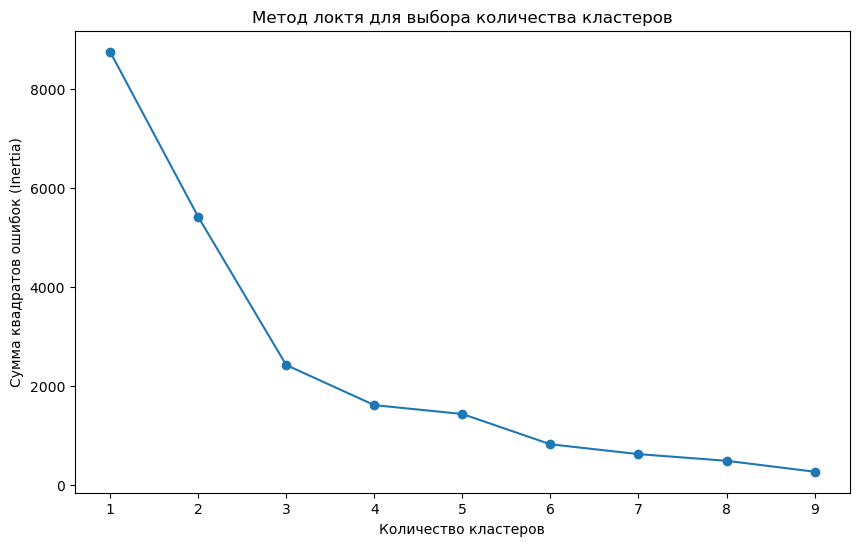

In [24]:
# Рассчитаем сумму квадратов ошибок (inertia) для различных значений количества кластеров
inertia = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(customer_metrics_scaled)
    inertia.append(kmeans.inertia_)

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Метод локтя для выбора количества кластеров")
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов ошибок (Inertia)")
plt.show()

In [25]:
# Применим K-means с выбранным количеством кластеров (например, 3)
optimal_k = 3  # замените на оптимальное значение, определенное по методу локтя
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
customer_metrics['Cluster'] = kmeans.fit_predict(customer_metrics_scaled)

# Посмотрим, как клиенты распределены по новым кластерам
customer_metrics['Cluster'].value_counts()

Cluster
0    4360
2      10
1       2
Name: count, dtype: int64

Результаты снова показывают сильное смещение клиентов в один кластер, что может означать, что два признака (TotalQuantity и TotalSpent) недостаточны для качественного разделения клиентов. Чтобы улучшить сегментацию, можно попробовать:

   1. Добавить новые признаки, такие как:
    - Средняя цена покупки (AveragePrice).
    - Частота покупок (например, количество уникальных дней покупок на клиента).
   2. Применить другие алгоритмы кластеризации, такие как DBSCAN, которые могут лучше справляться с неравномерными кластерами.

In [26]:
# Добавим частоту покупок, используя количество уникальных дат покупок для каждого клиента
frequency = X.groupby('CustomerID')['InvoiceDate'].nunique()
customer_metrics['Frequency'] = frequency

# Стандартизируем обновленный набор данных
customer_metrics_scaled = scaler.fit_transform(customer_metrics[['TotalQuantity', 'TotalSpent', 'Frequency']])

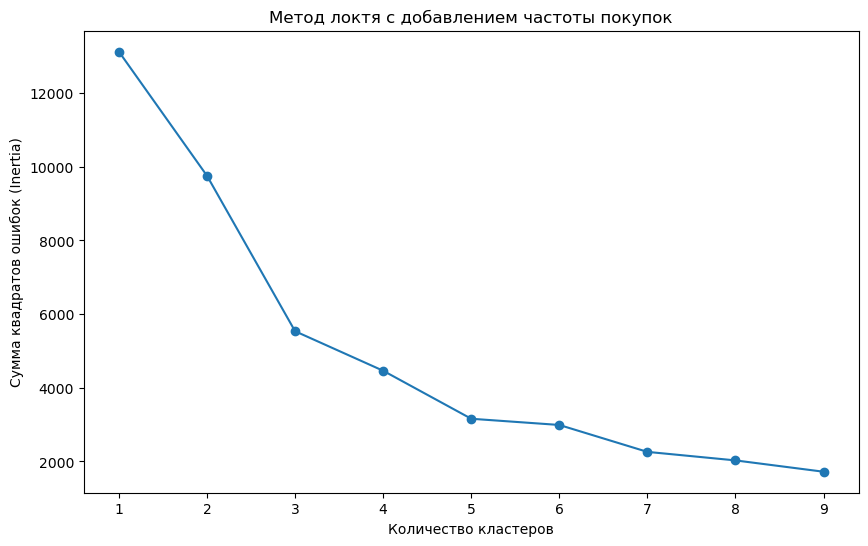

In [27]:
# Рассчитаем сумму квадратов ошибок (inertia) для различных значений количества кластеров
inertia = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(customer_metrics_scaled)
    inertia.append(kmeans.inertia_)

# Построим график метода локтя
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Метод локтя с добавлением частоты покупок")
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов ошибок (Inertia)")
plt.show()

In [28]:
# Применим K-means с новым оптимальным количеством кластеров, например, 3
optimal_k = 3  # Замените на оптимальное значение, определенное по методу локтя
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
customer_metrics['Cluster'] = kmeans.fit_predict(customer_metrics_scaled)

# Проверим распределение клиентов по кластерам
customer_metrics['Cluster'].value_counts()

Cluster
0    4350
2      20
1       2
Name: count, dtype: int64

Ситуация с распределением клиентов по кластерам всё ещё остается неравномерной, несмотря на добавление признака Frequency. Это может означать, что K-means не подходит для данных с такими характеристиками, либо что большинство клиентов действительно имеют очень похожее поведение, а небольшое количество — более уникальные паттерны.

В этом случае полезно попробовать другой метод кластеризации, например, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), который часто хорошо работает с неравномерными распределениями данных и может выявлять кластеры с высокой плотностью, игнорируя выбросы.

In [29]:
from sklearn.cluster import DBSCAN

# Применим DBSCAN с произвольными параметрами
# eps - радиус для поиска соседей, min_samples - минимальное количество точек для формирования кластера
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_metrics['DBSCAN_Cluster'] = dbscan.fit_predict(customer_metrics_scaled)

# Проверим распределение клиентов по кластерам DBSCAN
customer_metrics['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 0    4305
-1      60
 1       7
Name: count, dtype: int64

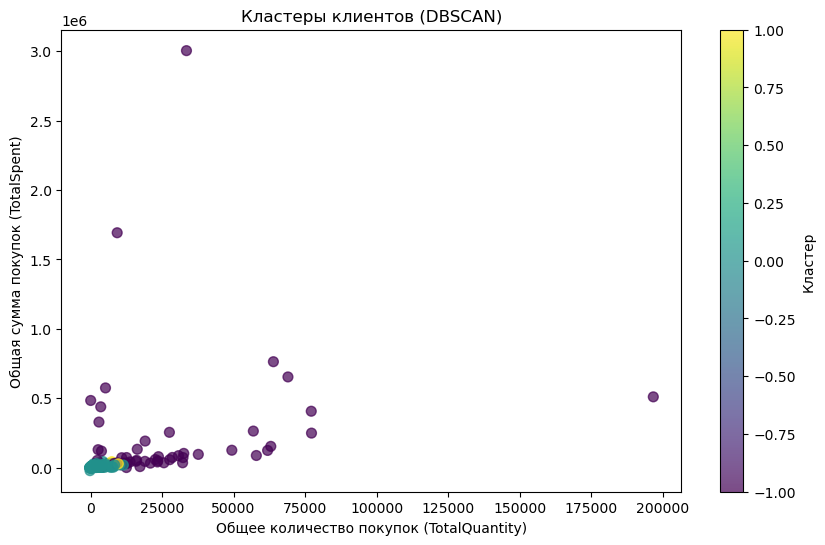

In [30]:
# Визуализируем кластеры по признакам TotalQuantity и TotalSpent
plt.figure(figsize=(10, 6))
plt.scatter(customer_metrics['TotalQuantity'], customer_metrics['TotalSpent'], 
            c=customer_metrics['DBSCAN_Cluster'], cmap='viridis', marker='o', s=50, alpha=0.7)
plt.title("Кластеры клиентов (DBSCAN)")
plt.xlabel("Общее количество покупок (TotalQuantity)")
plt.ylabel("Общая сумма покупок (TotalSpent)")
plt.colorbar(label='Кластер')
plt.show()

Возможные выводы:

    Основной кластер (темно-фиолетовые точки) включает большинство клиентов с низкими значениями покупок и трат, что, вероятно, соответствует типичным покупателям.
    Выбросы (желтые точки, обозначенные как -1) — это либо клиенты с уникальными паттернами поведения, либо ошибки данных.
    Редкие высокоактивные клиенты — отдельные точки с большими значениями по TotalQuantity и TotalSpent, что может указывать на клиентов с высоким вкладом в общие продажи.

In [31]:
# Рассчитаем средние значения для каждой метрики по каждому кластеру
cluster_summary = customer_metrics.groupby('DBSCAN_Cluster').agg({
    'TotalQuantity': 'mean',
    'TotalSpent': 'mean',
    'Frequency': 'mean'
})

print("Характеристики по каждому кластеру:")
cluster_summary

Характеристики по каждому кластеру:


,TotalQuantity,TotalSpent,Frequency
DBSCAN_Cluster,,,
-1,25367.483333,204431.375519,48.500000
0,768.966551,2258.018978,4.364925
1,8522.285714,30022.211096,47.571429


Выводы и маркетинговые рекомендации

    Кластер 0: Основной сегмент клиентов с умеренной активностью.
    Кластер 1: Высокоактивные клиенты, потенциально ценные для программ лояльности.
    Кластер -1: Выбросы или аномальные клиенты — может потребоваться индивидуальный подход для анализа.

Кластер 0 (основной сегмент):

    Характеристики: Клиенты с умеренной активностью, низкими и средними значениями по количеству покупок и суммам трат.
    Рекомендации: Поддерживайте регулярные акции и программы лояльности для увеличения их покупательской активности.

Кластер 1 (высокоактивные клиенты):

    Характеристики: Клиенты с высоким уровнем активности и высокими тратами.
    Рекомендации: Рассмотрите специальные программы лояльности, такие как персонализированные скидки и предложения, чтобы удержать этих клиентов и увеличить их лояльность.

Кластер -1 (выбросы или аномальные клиенты):

    Характеристики: Клиенты с уникальными характеристиками, которые не вписываются в стандартные сегменты.
    Рекомендации: Проведите более глубокий анализ этих клиентов, чтобы понять их поведение. Возможные действия — персонализированные предложения или включение этих клиентов в отдельный сегмент для более тщательного наблюдения.

In [32]:
# Форматируем отчет на основе данных кластера
report = f"""
Отчет по сегментации клиентов:

1. Кластер 0 (Основной сегмент):
   - Характеристики: Умеренная активность, низкие и средние значения по количеству покупок и тратам.
   - Рекомендации: Поддержка регулярных акций и программ лояльности.

2. Кластер 1 (Высокоактивные клиенты):
   - Характеристики: Высокая покупательская активность и траты.
   - Рекомендации: Специальные программы лояльности и персонализированные предложения для удержания клиентов.

3. Кластер -1 (Выбросы/Аномальные клиенты):
   - Характеристики: Клиенты с уникальными характеристиками.
   - Рекомендации: Дополнительный анализ и возможные персонализированные предложения.
"""

print(report)


Отчет по сегментации клиентов:

1. Кластер 0 (Основной сегмент):
   - Характеристики: Умеренная активность, низкие и средние значения по количеству покупок и тратам.
   - Рекомендации: Поддержка регулярных акций и программ лояльности.

2. Кластер 1 (Высокоактивные клиенты):
   - Характеристики: Высокая покупательская активность и траты.
   - Рекомендации: Специальные программы лояльности и персонализированные предложения для удержания клиентов.

3. Кластер -1 (Выбросы/Аномальные клиенты):
   - Характеристики: Клиенты с уникальными характеристиками.
   - Рекомендации: Дополнительный анализ и возможные персонализированные предложения.



In [33]:
# Сохраним отчет в текстовом файле
with open("customer_segmentation_report.txt", "w", encoding="utf-8") as file:
    file.write(report)

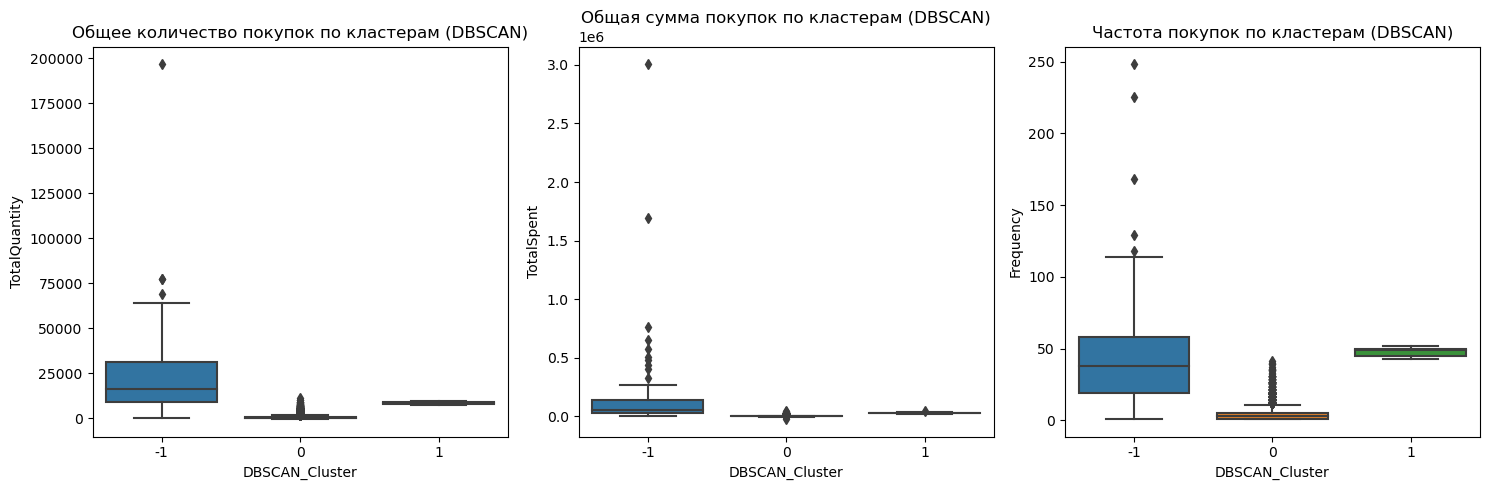

In [34]:
# Построим боксплоты (box plots) для визуализации характеристик по кластерам
import seaborn as sns

plt.figure(figsize=(15, 5))

# Boxplot для TotalQuantity
plt.subplot(1, 3, 1)
sns.boxplot(data=customer_metrics, x='DBSCAN_Cluster', y='TotalQuantity')
plt.title("Общее количество покупок по кластерам (DBSCAN)")

# Boxplot для TotalSpent
plt.subplot(1, 3, 2)
sns.boxplot(data=customer_metrics, x='DBSCAN_Cluster', y='TotalSpent')
plt.title("Общая сумма покупок по кластерам (DBSCAN)")

# Boxplot для Frequency
plt.subplot(1, 3, 3)
sns.boxplot(data=customer_metrics, x='DBSCAN_Cluster', y='Frequency')
plt.title("Частота покупок по кластерам (DBSCAN)")

plt.tight_layout()
plt.show()

In [35]:
# Сохраним таблицу с метриками и кластерами в CSV
customer_metrics.to_csv("customer_metrics_with_clusters.csv", index=True)